In [1]:
# Predicting concrete strength from 8 different regressors by modelling an ANN
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 
library(dplyr)
library(tidyr)
library(neuralnet)
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

concrete = read_csv("../input/concrete_data.csv")
# Any results you write to the current directory are saved as output.
str(concrete)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘neuralnet’

The following object is masked from ‘package:dplyr’:

    compute

Parsed with column specification:
cols(
  cement = col_double(),
  blast_furnace_slag = col_double(),
  fly_ash = col_double(),
  water = col_double(),
  superplasticizer = col_double(),
  coarse_aggregate = col_double(),
  fine_aggregate = col_double(),
  age = col_double(),
  concrete_compressive_strength = col_double()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1030 obs. of  9 variables:
 $ cement                       : num  540 540 332 332 199 ...
 $ blast_furnace_slag           : num  0 0 142 142 132 ...
 $ fly_ash                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ water                        : num  162 162 228 228 192 228 228 228 228 228 ...
 $ superplasticizer             : num  2.5 2.5 0 0 0 0 0 0 0 0 ...
 $ coarse_aggregate             : num  1040 1055 932 932 978 ...
 $ fine_aggregate               : num  676 676 594 594 826 ...
 $ age                          : num  28 28 270 365 360 90 365 28 28 28 ...
 $ concrete_compressive_strength: num  80 61.9 40.3 41 44.3 ...
 - attr(*, "spec")=
  .. cols(
  ..   cement = col_double(),
  ..   blast_furnace_slag = col_double(),
  ..   fly_ash = col_double(),
  ..   water = col_double(),
  ..   superplasticizer = col_double(),
  ..   coarse_aggregate = col_double(),
  ..   fine_aggregate = col_double(),
  ..   age = col_double(),
  ..   concrete_com

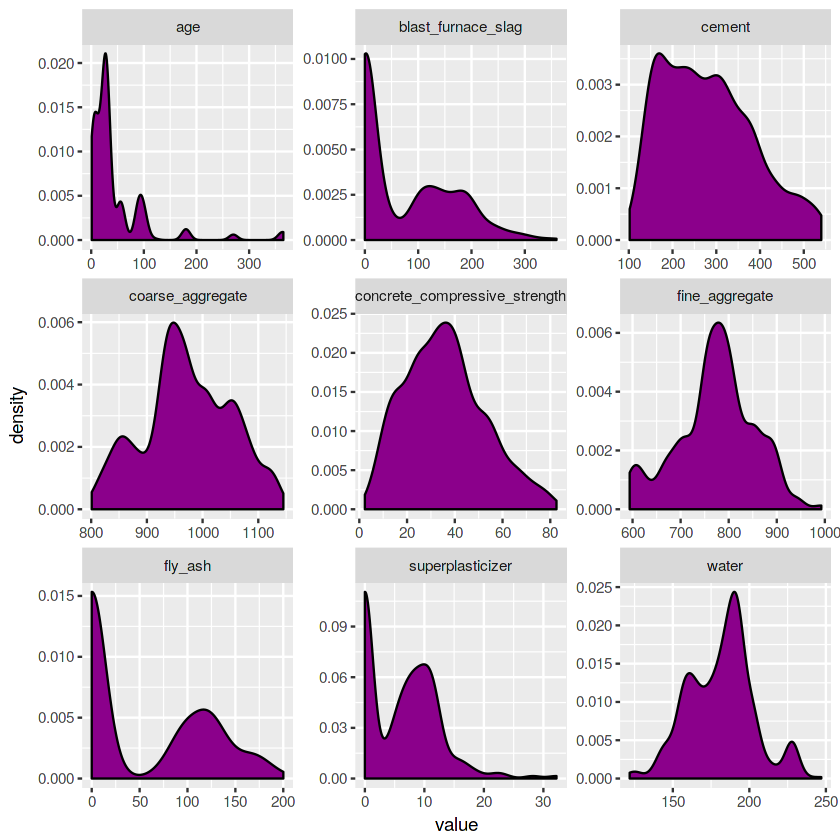

In [2]:
#the data follow a uniform distribution or are severely nonnormal
  concrete %>% gather() %>%
  ggplot(aes(value)) +                     
    facet_wrap(~ key, scales = "free") +   
    geom_density(fill = "darkmagenta")  

In [3]:
# function to normailize between 0-1
normalize <- function(x) {
    return((x - min(x)) / (max(x) - min(x)))
  }
concrete_normal = data.frame(lapply(concrete, normalize))
summary(concrete_normal)

     cement       blast_furnace_slag    fly_ash           water       
 Min.   :0.0000   Min.   :0.00000    Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2063   1st Qu.:0.00000    1st Qu.:0.0000   1st Qu.:0.3442  
 Median :0.3902   Median :0.06121    Median :0.0000   Median :0.5048  
 Mean   :0.4091   Mean   :0.20561    Mean   :0.2708   Mean   :0.4774  
 3rd Qu.:0.5662   3rd Qu.:0.39775    3rd Qu.:0.5912   3rd Qu.:0.5607  
 Max.   :1.0000   Max.   :1.00000    Max.   :1.0000   Max.   :1.0000  
 superplasticizer coarse_aggregate fine_aggregate        age         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.3808   1st Qu.:0.3436   1st Qu.:0.01648  
 Median :0.1988   Median :0.4855   Median :0.4654   Median :0.07418  
 Mean   :0.1927   Mean   :0.4998   Mean   :0.4505   Mean   :0.12270  
 3rd Qu.:0.3168   3rd Qu.:0.6640   3rd Qu.:0.5770   3rd Qu.:0.15110  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
 concrete_com

In [4]:
# dividing into train and test
index = sample(nrow(concrete_normal), 0.75 * nrow(concrete_normal))
train = concrete_normal[index,]
test = concrete_normal[-index,]

In [5]:
# Building the ANN model with default parameters
concrete_model = neuralnet(concrete_compressive_strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age, data = train)
plot(concrete_model)

# using model to predict concrete strength
model_results <- compute(concrete_model, test[1:8])
predicted_str = model_results$net.result

#Finding correlation between predicted output and true output
cor(predicted_str, test$concrete_compressive_strength)

0.8050864585


In [6]:
# Building a second ANN model with number of nodes in hidden layer as 5 to improve performance
concrete_model2 = neuralnet(concrete_compressive_strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age, data = train, hidden = 5)
plot(concrete_model2)

model_results2 <- compute(concrete_model2, test[1:8])

predicted_str2 = model_results2$net.result

cor(predicted_str2, test$concrete_compressive_strength)

0.9364345229
